In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
import pandas as pd 
data_full = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/witcher_network.csv')

# 1. data_full

In [11]:
data_full # undirected, weighted, edgelist

,Unnamed: 0,Source,Target,Type,Weight,book
0,0,Velerad,Geralt,Undirected,1,1
1,1,Geralt,Foltest,Undirected,5,1
2,2,Foltest,Geralt,Undirected,4,1
3,3,Adda,Geralt,Undirected,1,1
4,4,Geralt,Ostrit,Undirected,4,1
...,...,...,...,...,...,...
2595,2595,Lytta,Ciri,Undirected,2,7
2596,2596,Lytta,Triss,Undirected,1,7
2597,2597,Triss,Dandelion,Undirected,1,7
2598,2598,Triss,Yarpen,Undirected,1,7


In [12]:
df_f = data_full[['Source', 'Target', 'Weight']]
df_f.drop_duplicates(subset=['Source', 'Target', 'Weight'], inplace=True)

#these characters were way off to the side which made the rest of the network scrunch up so I decided to delete them form the dataframe
df_f = df_f.drop(df_f.index[df_f['Source'] == 'Vreemde'])
df_f = df_f.drop(df_f.index[df_f['Source'] == 'Morteisen'])
df_f = df_f.drop(df_f.index[df_f['Target'] == 'Vreemde'])
df_f = df_f.drop(df_f.index[df_f['Target'] == 'Morteisen'])

<ipython-input-12-2a014edd5e6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f.drop_duplicates(subset=['Source', 'Target', 'Weight'], inplace=True)


In [13]:
df_f

,Source,Target,Weight
0,Velerad,Geralt,1
1,Geralt,Foltest,5
2,Foltest,Geralt,4
3,Adda,Geralt,1
4,Geralt,Ostrit,4
...,...,...,...
2595,Lytta,Ciri,2
2596,Lytta,Triss,1
2597,Triss,Dandelion,1
2598,Triss,Yarpen,1


In [14]:
df_f.describe()

,Weight
count,2383.000000
mean,3.406630
std,6.451621
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,88.000000


In [15]:
'''
https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html

source = A valid column name (string or integer) for the source nodes (for the directed case)
target = A valid column name (string or integer) for the target nodes (for the directed case)
* directed인 경우 source -> target, undirected인 경우 source와 target의 source - target

edge_attr = A valid column name (str or int) or iterable of column names that are used to retrieve items and add them to the graph as edge attributes.
            If True, all of the remaining columns will be added. If None, no edge attributes are added to the graph.
'''

G_data_full = nx.from_pandas_edgelist(df_f, source='Source', target='Target', edge_attr='Weight')

# # directed graph의 경우 create_using=nx.DiGraph() 설정
# G = nx.from_pandas_edgelist(df_f,  source='Source', target='Target', edge_attr='weight', create_using=nx.DiGraph())

- Node: 위쳐의 인물
- Edge: 인물들 간의 친밀도

In [16]:
print('Number of nodes:', nx.number_of_nodes(G_data_full))
print('Number of edges:', nx.number_of_edges(G_data_full))

Number of nodes: 222
Number of edges: 1266


In [17]:
G_data_full.nodes

NodeView(('Velerad', 'Geralt', 'Foltest', 'Adda', 'Ostrit', 'Two', 'Yennefer', 'Nenneke', 'Iola', 'Roach', 'Nivellen', 'Fenne', 'Asse', 'Vereena', 'Hereward', 'Falwick', 'Caldemeyn', 'Stregobor', 'Count', 'Eltibald', 'Fredefalk', 'Renfri', 'Nohorn', 'Tavik', 'Civril', 'Fifteen', 'Audoen', 'Libushe', 'Baron', 'Haxo', 'Pavetta', 'Calanthe', 'Rainfarn', 'Windhalm', 'Eist', 'Crach', 'Draig', 'Drogodar', 'Vissegerd', 'Ravix', 'Mousesack', 'Roegner', 'Sir', 'Rumplestelt', 'Akerspaark', 'Nettly', 'Dhun', 'Lille', 'Little', 'Torque', 'Galarr', 'Aen', 'Vanadain', 'Toruviel', 'Filavandrel', 'Field', 'King', 'Chireadan', 'Errdil', 'Vratimir', 'Beau', 'Triss', 'Laurelnose', 'Neville', 'Eskel', 'Vesemir', 'Dennis', 'Istredd', 'Herbolth', 'Seven', 'Vespula', 'Dandelion', 'Gar', 'Dudu', 'Vimme', 'Sword', 'Agloval', 'Teleri', 'Essi', 'Duke', 'Zelest', 'Veverka', 'Braenn', 'Freixenet', 'Eithné', 'Ciri', 'Venzlav', 'Guy', 'Yurga', 'Visenna', 'Sheldon', 'Donimir', 'Rience', 'Lambert', 'Vanielle', 'Ori', 

In [18]:
G_data_full.edges

EdgeView([('Velerad', 'Geralt'), ('Velerad', 'Ostrit'), ('Velerad', 'Foltest'), ('Geralt', 'Foltest'), ('Geralt', 'Adda'), ('Geralt', 'Ostrit'), ('Geralt', 'Nenneke'), ('Geralt', 'Iola'), ('Geralt', 'Roach'), ('Geralt', 'Two'), ('Geralt', 'Nivellen'), ('Geralt', 'Fenne'), ('Geralt', 'Asse'), ('Geralt', 'Vereena'), ('Geralt', 'Hereward'), ('Geralt', 'Falwick'), ('Geralt', 'Caldemeyn'), ('Geralt', 'Stregobor'), ('Geralt', 'Eltibald'), ('Geralt', 'Fredefalk'), ('Geralt', 'Nohorn'), ('Geralt', 'Renfri'), ('Geralt', 'Libushe'), ('Geralt', 'Audoen'), ('Geralt', 'Civril'), ('Geralt', 'Haxo'), ('Geralt', 'Calanthe'), ('Geralt', 'Rainfarn'), ('Geralt', 'Drogodar'), ('Geralt', 'Draig'), ('Geralt', 'Vissegerd'), ('Geralt', 'Crach'), ('Geralt', 'Eist'), ('Geralt', 'Mousesack'), ('Geralt', 'Roegner'), ('Geralt', 'Pavetta'), ('Geralt', 'Nettly'), ('Geralt', 'Dhun'), ('Geralt', 'Lille'), ('Geralt', 'Little'), ('Geralt', 'Galarr'), ('Geralt', 'Torque'), ('Geralt', 'Aen'), ('Geralt', 'Vanadain'), ('Ger

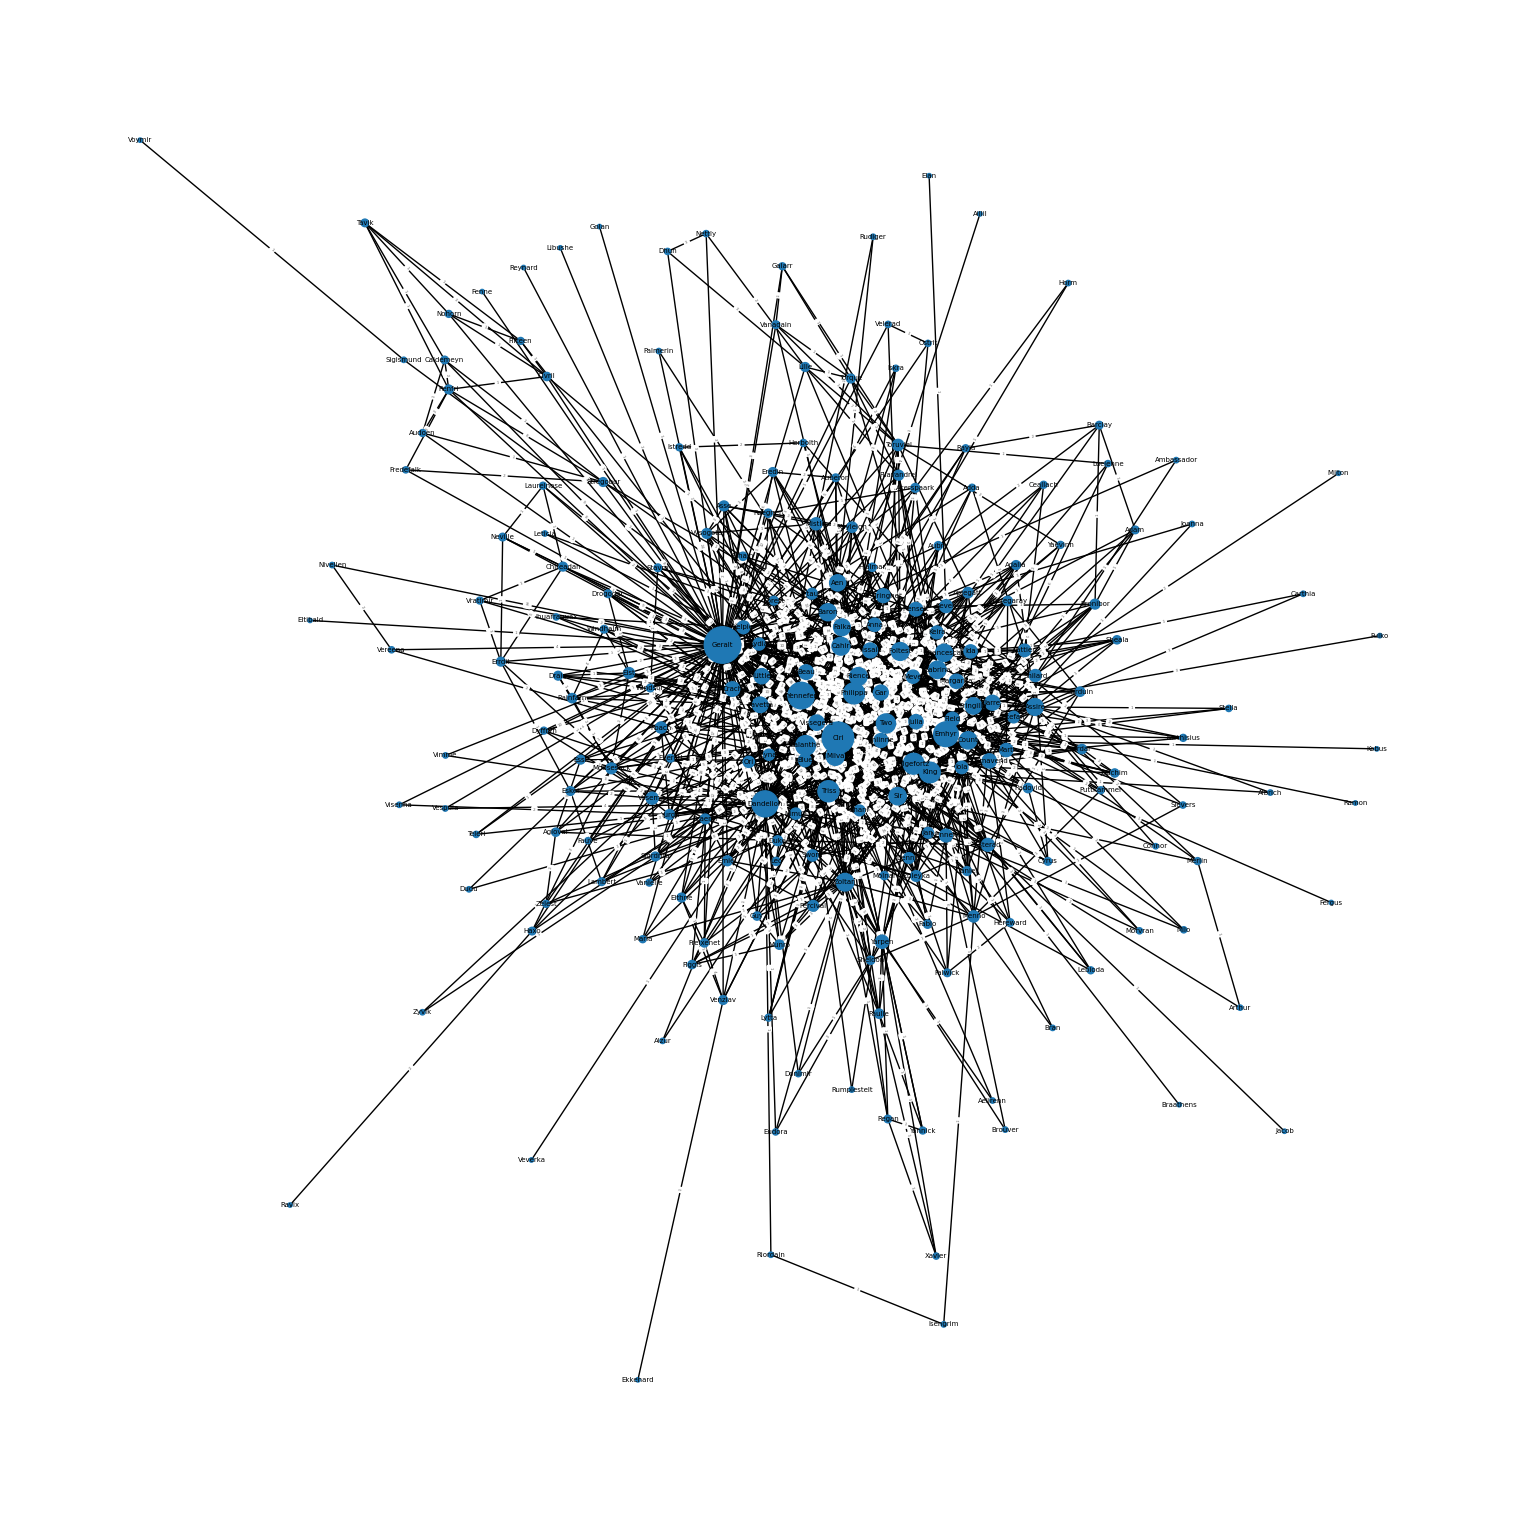

In [19]:
plt.figure(figsize=(15, 15))

degree = nx.degree(G_data_full)
pos=nx.spring_layout(G_data_full)
nx.draw(G_data_full, pos, with_labels=True, node_size=[5 + v[1]*5 for v in degree], font_size = 5) # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
edge_weight = nx.get_edge_attributes(G_data_full, 'Weight')
nx.draw_networkx_edge_labels(G_data_full, pos, edge_labels = edge_weight, alpha=0.6, font_size=3) # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edge_labels.html
plt.show()

In [20]:
print(degree)

[('Velerad', 3), ('Geralt', 137), ('Foltest', 32), ('Adda', 4), ('Ostrit', 3), ('Two', 37), ('Yennefer', 72), ('Nenneke', 16), ('Iola', 15), ('Roach', 12), ('Nivellen', 2), ('Fenne', 1), ('Asse', 9), ('Vereena', 3), ('Hereward', 5), ('Falwick', 5), ('Caldemeyn', 5), ('Stregobor', 7), ('Count', 30), ('Eltibald', 1), ('Fredefalk', 3), ('Renfri', 7), ('Nohorn', 4), ('Tavik', 5), ('Civril', 6), ('Fifteen', 4), ('Audoen', 4), ('Libushe', 1), ('Baron', 29), ('Haxo', 5), ('Pavetta', 24), ('Calanthe', 39), ('Rainfarn', 8), ('Windhalm', 5), ('Eist', 11), ('Crach', 21), ('Draig', 7), ('Drogodar', 5), ('Vissegerd', 23), ('Ravix', 1), ('Mousesack', 11), ('Roegner', 6), ('Sir', 30), ('Rumplestelt', 2), ('Akerspaark', 7), ('Nettly', 3), ('Dhun', 3), ('Lille', 7), ('Little', 23), ('Torque', 7), ('Galarr', 4), ('Aen', 26), ('Vanadain', 5), ('Toruviel', 12), ('Filavandrel', 9), ('Field', 19), ('King', 43), ('Chireadan', 7), ('Errdil', 7), ('Vratimir', 4), ('Beau', 21), ('Triss', 45), ('Laurelnose', 4),

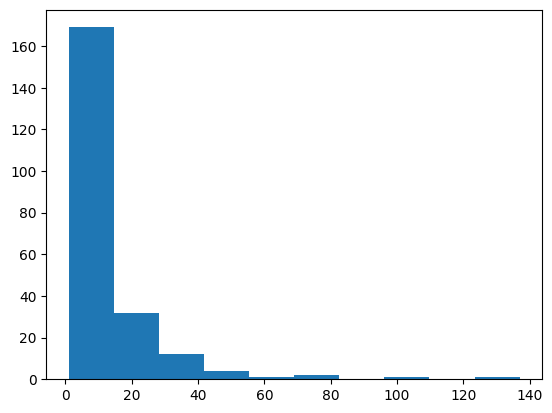

In [21]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(dict(degree).values())
plt.show()

In [22]:
dict(degree).values()

dict_values([3, 137, 32, 4, 3, 37, 72, 16, 15, 12, 2, 1, 9, 3, 5, 5, 5, 7, 30, 1, 3, 7, 4, 5, 6, 4, 4, 1, 29, 5, 24, 39, 8, 5, 11, 21, 7, 5, 23, 1, 11, 6, 30, 2, 7, 3, 3, 7, 23, 7, 4, 26, 5, 12, 9, 19, 43, 7, 7, 4, 21, 45, 4, 5, 7, 14, 11, 4, 4, 16, 2, 69, 22, 2, 2, 12, 6, 3, 7, 9, 4, 1, 9, 6, 7, 102, 7, 6, 9, 2, 6, 3, 31, 5, 4, 12, 7, 17, 3, 5, 4, 8, 18, 2, 5, 11, 45, 17, 6, 62, 19, 44, 1, 11, 22, 14, 22, 11, 16, 10, 20, 19, 30, 2, 4, 6, 6, 17, 20, 28, 4, 2, 16, 30, 8, 17, 8, 16, 2, 2, 1, 3, 3, 9, 12, 8, 15, 13, 4, 4, 32, 10, 3, 14, 2, 33, 4, 14, 28, 6, 2, 31, 11, 8, 6, 9, 2, 6, 7, 27, 4, 2, 3, 17, 7, 2, 4, 11, 7, 2, 9, 16, 2, 2, 6, 5, 5, 1, 20, 8, 1, 4, 1, 6, 3, 2, 12, 12, 1, 2, 1, 6, 7, 5, 3, 1, 5, 4, 5, 1, 2, 1, 1, 3, 1, 1, 5, 2, 3, 3, 2, 4])

## Social Network Analysis: data_full

### 1) Structure
- diameter: 네트워크에서 가장 멀리 연결된 pair의 거리
  - 모든 노드 쌍에 대해 Shortest Path를 계산 후, 그 중 가장 큰 값을 가지는 Path의 길이
- density: 모든 edge의 개수와 실제 edge 수(k)의 비
  - undirected: $k/n(n-1)/2$
  - directed: $k/n(n-1)$
- reciprocity: 주고 받는 비율 (i.e., A가 B를 친구로 지명하였을 때, B가 A를 친구로 지명) 
  - directed graph에서만 의미가 있음
- transitivity: 3 이상의 관계에서 연결된 비율 (i.e., A가 B를 친구로 지명하고, B는 C를 친구로 지명했을 때, A가 C를 친구로 지명)


In [23]:
print('diamter:', nx.diameter(G_data_full))
print('density:', nx.density(G_data_full))
print('transitivity:', nx.transitivity(G_data_full))
print('reciprocity:', nx.reciprocity(G_data_full))

diamter: 5
density: 0.05160816925522808
transitivity: 0.25670526709002617
reciprocity: 0.0


### 2) Centrality
- Degree centrality (연결 중심성): 마당발이 누구인가? 누가 직접적 이웃이 가장 많은가?
  - Normalized degree centrality: 표준화를 위해 전체를 N-1로 나눠줌
- Betweenness centrality (매개 중심성): 얼마나 많은 최단 경로가 특정 노드를 지나는가?
  - Broker 역할을 하는 node를 찾을 수 있음
  - $C_B(i)=\sum_{j<k}g_{jk}(i)/g_{jk}$ where $g_{jk}$: jk를 연결하는 geodesics 수, 그 중 $g_{jk}(i)$: node i가 포함되어있는 경우
  - Normalized betweeness centrality: $C_B^*(i)=\frac{C_B(i)}{\frac{(N-1)(N-2)}{2}}$
- Closeness centrality (근접 중심성): 누가 다른 노드들에 대한 최단거리를 가지는가? (다른 노드들에 가장 빨리 정보를 확산시킬 수 있는가?)
  - 모든 다른 노드들과의 거리가 가장 가까운 노드가 중요한 노드
  - $C_C(i)=[\sum_{j=1}^{N-1}d(i,j)]^{-1}$
  - Normalized closness centrality: $C_C^*(i)=(N-1)C_C(i)$
- Eigenvector centrality (Bonacich power centrality): 누가 중요한 노드들과 연결이 많이 되어 있는가? 
  - 연결된 이웃의 중요도에 가중치를 부여
  - $C_E(v_i) \propto\sum_{v_j \in N_i}A_{ij}C_E(v_j)$, $A\mathbf{x}=\lambda \mathbf{x}$

- [참고](https://chaelist.github.io/docs/network_analysis/network_basics/#neighbors--degree)
- 이 외에 Katz centrality, PageRank [참고](https://bab2min.tistory.com/554)


In [24]:
deg_cen = nx.degree_centrality(G_data_full)
bet_cen = nx.betweenness_centrality(G_data_full)
clo_cen = nx.closeness_centrality(G_data_full)
eig_cen = nx.eigenvector_centrality(G_data_full)

In [25]:
# 각 centrality별 가장 값이 높은 3개의 node 추출
print('degree centrality:\n', sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('betweenness centrality:\n', sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('closeness centrality:\n', sorted(clo_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('eigenvector centrality:\n', sorted(eig_cen.items(), key=lambda x:x[1], reverse=True)[0:3])

degree centrality:
 [('Geralt', 0.6199095022624435), ('Ciri', 0.46153846153846156), ('Yennefer', 0.3257918552036199)]
betweenness centrality:
 [('Geralt', 0.3917440422628955), ('Ciri', 0.14917506159328225), ('Dandelion', 0.07982894426906378)]
closeness centrality:
 [('Geralt', 0.7198697068403909), ('Ciri', 0.638728323699422), ('Dandelion', 0.5800524934383202)]
eigenvector centrality:
 [('Geralt', 0.302577502003062), ('Ciri', 0.28564285851311527), ('Yennefer', 0.22734753044606196)]


# 2. data_half

In [26]:
data_half = data_full.drop(data_full.index[data_full['book'] == 5])
data_half = data_half.drop(data_full.index[data_full['book'] == 6])
data_half = data_half.drop(data_full.index[data_full['book'] == 7])
data_half = data_half.drop(data_full.index[data_full['book'] == 8])

In [27]:
data_half # undirected, weighted, edgelist

,Unnamed: 0,Source,Target,Type,Weight,book
0,0,Velerad,Geralt,Undirected,1,1
1,1,Geralt,Foltest,Undirected,5,1
2,2,Foltest,Geralt,Undirected,4,1
3,3,Adda,Geralt,Undirected,1,1
4,4,Geralt,Ostrit,Undirected,4,1
...,...,...,...,...,...,...
1146,1146,Aen,Rudiger,Undirected,1,4
1147,1147,Mistle,Rudiger,Undirected,1,4
1148,1148,Rudiger,Mistle,Undirected,1,4
1149,1149,Mistle,Asse,Undirected,2,4


In [28]:
df_h = data_half[['Source', 'Target', 'Weight']]
df_h.drop_duplicates(subset=['Source', 'Target', 'Weight'], inplace=True)

#these characters were way off to the side which made the rest of the network scrunch up so I decided to delete them form the dataframe
df_h = df_h.drop(df_h.index[df_h['Source'] == 'Voymir'])
df_h = df_h.drop(df_h.index[df_h['Source'] == 'Sigismund'])
df_h = df_h.drop(df_h.index[df_h['Target'] == 'Voymir'])
df_h = df_h.drop(df_h.index[df_h['Target'] == 'Sigismund'])

<ipython-input-28-ea2d017f1059>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h.drop_duplicates(subset=['Source', 'Target', 'Weight'], inplace=True)


In [29]:
df_h

,Source,Target,Weight
0,Velerad,Geralt,1
1,Geralt,Foltest,5
2,Foltest,Geralt,4
3,Adda,Geralt,1
4,Geralt,Ostrit,4
...,...,...,...
1146,Aen,Rudiger,1
1147,Mistle,Rudiger,1
1148,Rudiger,Mistle,1
1149,Mistle,Asse,2


In [30]:
df_h.describe()

,Weight
count,1118.000000
mean,3.762075
std,7.011866
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,88.000000


In [31]:
'''
https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html

source = A valid column name (string or integer) for the source nodes (for the directed case)
target = A valid column name (string or integer) for the target nodes (for the directed case)
* directed인 경우 source -> target, undirected인 경우 source와 target의 source - target

edge_attr = A valid column name (str or int) or iterable of column names that are used to retrieve items and add them to the graph as edge attributes.
            If True, all of the remaining columns will be added. If None, no edge attributes are added to the graph.
'''

G_data_half = nx.from_pandas_edgelist(df_h, source='Source', target='Target', edge_attr='Weight')

# # directed graph의 경우 create_using=nx.DiGraph() 설정
# G = nx.from_pandas_edgelist(df_h,  source='Source', target='Target', edge_attr='weight', create_using=nx.DiGraph())

- Node: 위쳐의 인물
- Edge: 인물들 간의 친밀도

In [32]:
print('Number of nodes:', nx.number_of_nodes(G_data_half))
print('Number of edges:', nx.number_of_edges(G_data_half))

Number of nodes: 153
Number of edges: 663


In [33]:
G_data_half.nodes

NodeView(('Velerad', 'Geralt', 'Foltest', 'Adda', 'Ostrit', 'Two', 'Yennefer', 'Nenneke', 'Iola', 'Roach', 'Nivellen', 'Fenne', 'Asse', 'Vereena', 'Hereward', 'Falwick', 'Caldemeyn', 'Stregobor', 'Count', 'Eltibald', 'Fredefalk', 'Renfri', 'Nohorn', 'Tavik', 'Civril', 'Fifteen', 'Audoen', 'Libushe', 'Baron', 'Haxo', 'Pavetta', 'Calanthe', 'Rainfarn', 'Windhalm', 'Eist', 'Crach', 'Draig', 'Drogodar', 'Vissegerd', 'Ravix', 'Mousesack', 'Roegner', 'Sir', 'Rumplestelt', 'Akerspaark', 'Nettly', 'Dhun', 'Lille', 'Little', 'Torque', 'Galarr', 'Aen', 'Vanadain', 'Toruviel', 'Filavandrel', 'Field', 'King', 'Chireadan', 'Errdil', 'Vratimir', 'Beau', 'Triss', 'Laurelnose', 'Neville', 'Eskel', 'Vesemir', 'Dennis', 'Istredd', 'Herbolth', 'Seven', 'Vespula', 'Dandelion', 'Gar', 'Dudu', 'Vimme', 'Sword', 'Agloval', 'Teleri', 'Essi', 'Duke', 'Zelest', 'Veverka', 'Braenn', 'Freixenet', 'Eithné', 'Ciri', 'Venzlav', 'Guy', 'Yurga', 'Visenna', 'Sheldon', 'Donimir', 'Rience', 'Lambert', 'Vanielle', 'Ori', 

In [34]:
G_data_half.edges

EdgeView([('Velerad', 'Geralt'), ('Velerad', 'Ostrit'), ('Velerad', 'Foltest'), ('Geralt', 'Foltest'), ('Geralt', 'Adda'), ('Geralt', 'Ostrit'), ('Geralt', 'Nenneke'), ('Geralt', 'Iola'), ('Geralt', 'Roach'), ('Geralt', 'Two'), ('Geralt', 'Nivellen'), ('Geralt', 'Fenne'), ('Geralt', 'Asse'), ('Geralt', 'Vereena'), ('Geralt', 'Hereward'), ('Geralt', 'Falwick'), ('Geralt', 'Caldemeyn'), ('Geralt', 'Stregobor'), ('Geralt', 'Eltibald'), ('Geralt', 'Fredefalk'), ('Geralt', 'Nohorn'), ('Geralt', 'Renfri'), ('Geralt', 'Libushe'), ('Geralt', 'Audoen'), ('Geralt', 'Civril'), ('Geralt', 'Haxo'), ('Geralt', 'Calanthe'), ('Geralt', 'Rainfarn'), ('Geralt', 'Drogodar'), ('Geralt', 'Draig'), ('Geralt', 'Vissegerd'), ('Geralt', 'Crach'), ('Geralt', 'Eist'), ('Geralt', 'Mousesack'), ('Geralt', 'Roegner'), ('Geralt', 'Pavetta'), ('Geralt', 'Nettly'), ('Geralt', 'Dhun'), ('Geralt', 'Lille'), ('Geralt', 'Little'), ('Geralt', 'Galarr'), ('Geralt', 'Torque'), ('Geralt', 'Aen'), ('Geralt', 'Vanadain'), ('Ger

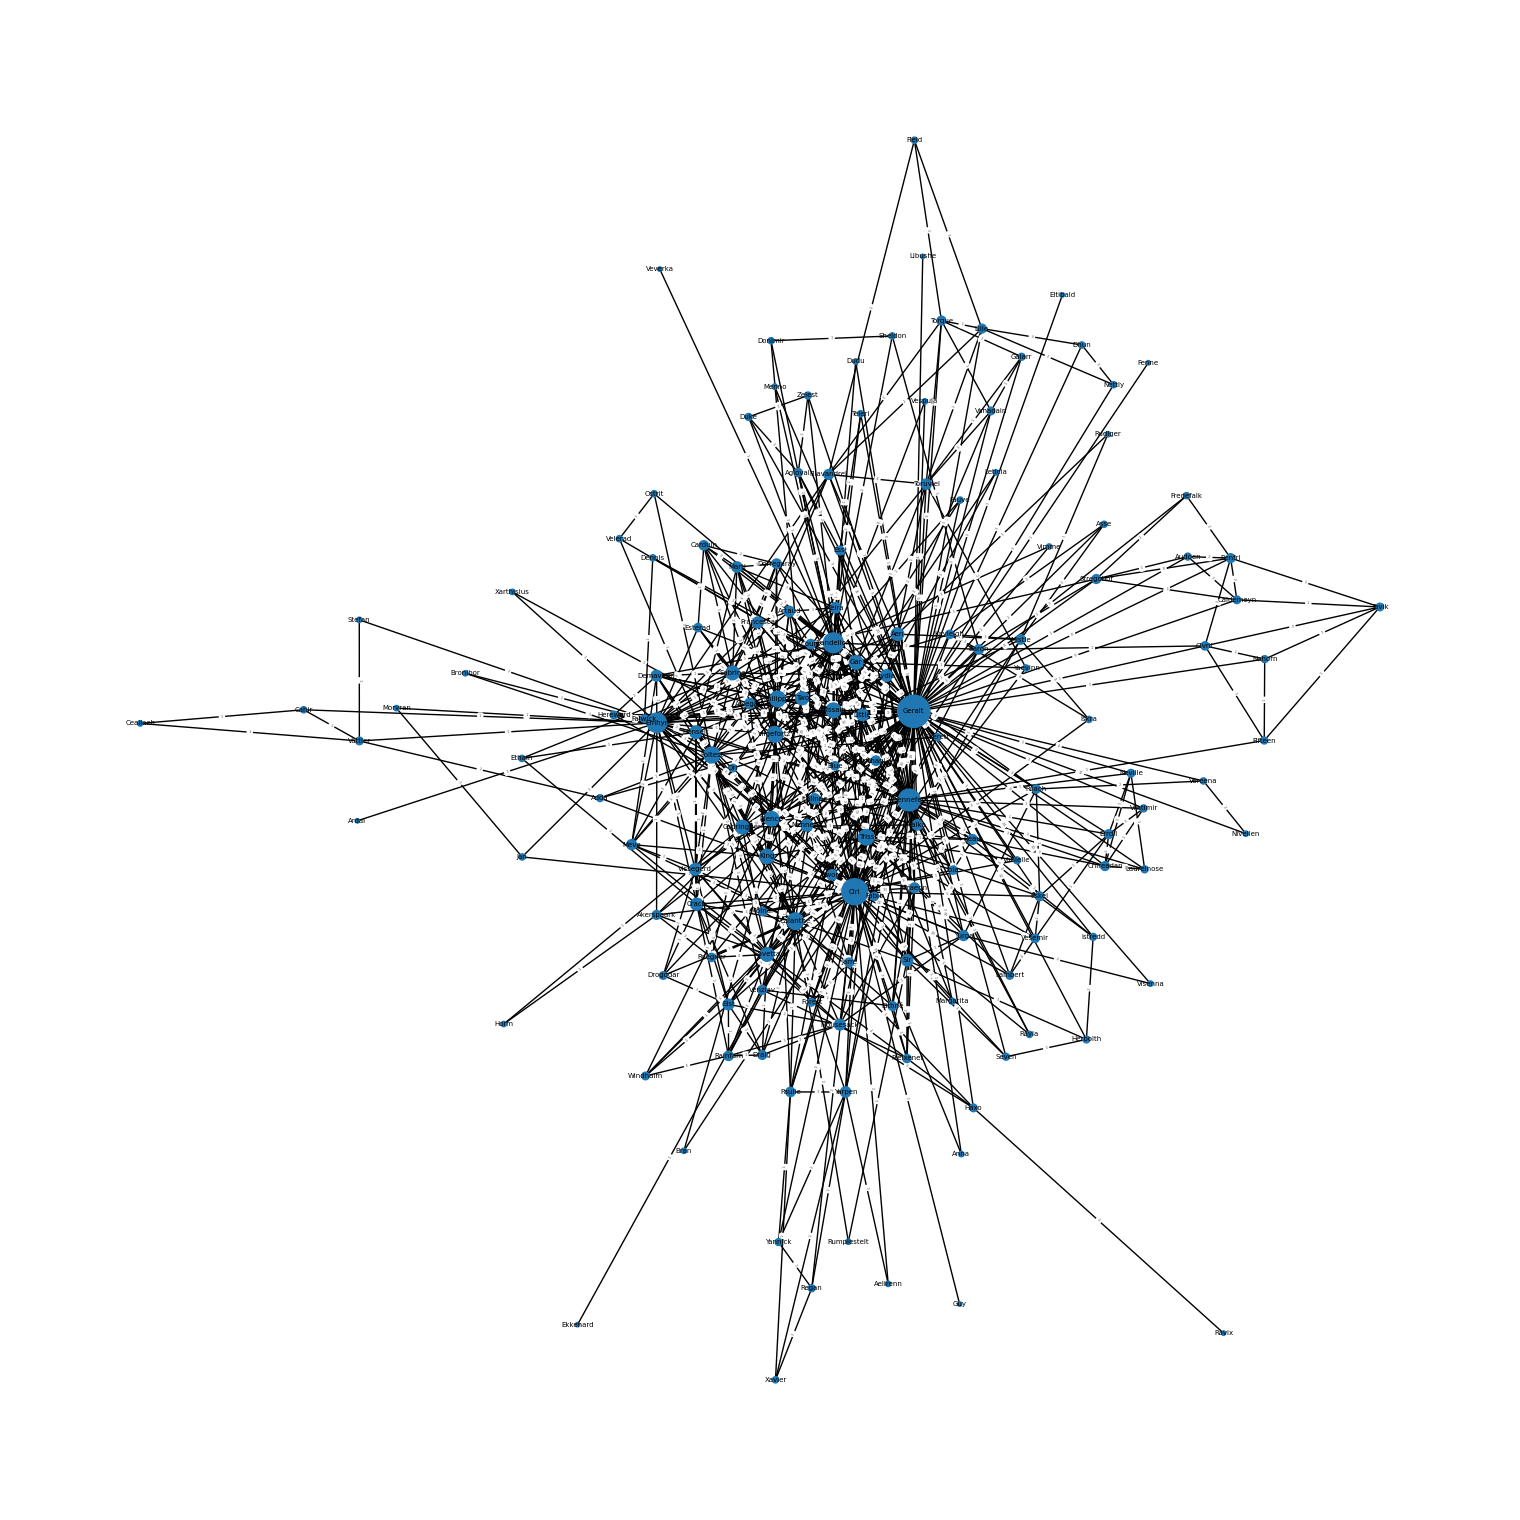

In [35]:
plt.figure(figsize=(15, 15))

degree = nx.degree(G_data_half)
pos=nx.spring_layout(G_data_half)
nx.draw(G_data_half, pos, with_labels=True, node_size=[5 + v[1]*5 for v in degree], font_size = 5) # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
edge_weight = nx.get_edge_attributes(G_data_half, 'Weight')
nx.draw_networkx_edge_labels(G_data_half, pos, edge_labels = edge_weight, alpha=0.6, font_size=3) # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edge_labels.html
plt.show()

In [36]:
print(degree)

[('Velerad', 3), ('Geralt', 107), ('Foltest', 25), ('Adda', 4), ('Ostrit', 3), ('Two', 16), ('Yennefer', 48), ('Nenneke', 13), ('Iola', 6), ('Roach', 6), ('Nivellen', 2), ('Fenne', 1), ('Asse', 3), ('Vereena', 3), ('Hereward', 5), ('Falwick', 5), ('Caldemeyn', 5), ('Stregobor', 7), ('Count', 8), ('Eltibald', 1), ('Fredefalk', 3), ('Renfri', 7), ('Nohorn', 4), ('Tavik', 5), ('Civril', 6), ('Fifteen', 4), ('Audoen', 4), ('Libushe', 1), ('Baron', 8), ('Haxo', 5), ('Pavetta', 18), ('Calanthe', 27), ('Rainfarn', 8), ('Windhalm', 5), ('Eist', 11), ('Crach', 14), ('Draig', 7), ('Drogodar', 5), ('Vissegerd', 13), ('Ravix', 1), ('Mousesack', 11), ('Roegner', 6), ('Sir', 12), ('Rumplestelt', 2), ('Akerspaark', 7), ('Nettly', 3), ('Dhun', 3), ('Lille', 7), ('Little', 13), ('Torque', 7), ('Galarr', 4), ('Aen', 15), ('Vanadain', 5), ('Toruviel', 10), ('Filavandrel', 9), ('Field', 3), ('King', 20), ('Chireadan', 7), ('Errdil', 7), ('Vratimir', 4), ('Beau', 9), ('Triss', 24), ('Laurelnose', 4), ('Nev

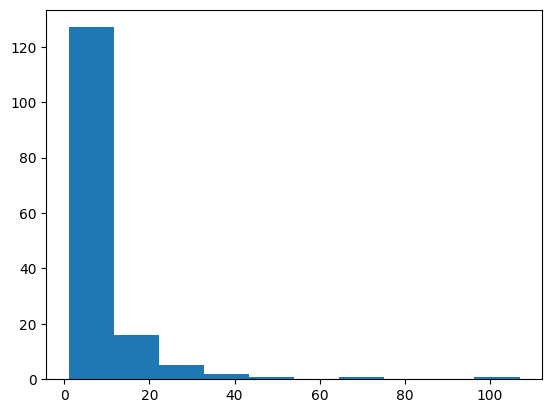

In [37]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(dict(degree).values())
plt.show()

In [38]:
dict(degree).values()

dict_values([3, 107, 25, 4, 3, 16, 48, 13, 6, 6, 2, 1, 3, 3, 5, 5, 5, 7, 8, 1, 3, 7, 4, 5, 6, 4, 4, 1, 8, 5, 18, 27, 8, 5, 11, 14, 7, 5, 13, 1, 11, 6, 12, 2, 7, 3, 3, 7, 13, 7, 4, 15, 5, 10, 9, 3, 20, 7, 7, 4, 9, 24, 4, 5, 7, 6, 3, 4, 4, 4, 2, 40, 18, 2, 2, 10, 6, 3, 7, 4, 4, 1, 9, 6, 7, 69, 7, 1, 9, 2, 3, 3, 21, 5, 4, 5, 5, 10, 3, 4, 4, 8, 15, 2, 4, 8, 24, 9, 3, 38, 10, 24, 1, 10, 21, 13, 7, 3, 6, 10, 11, 18, 18, 2, 3, 6, 6, 2, 3, 10, 3, 2, 6, 11, 8, 10, 8, 10, 2, 2, 3, 2, 2, 1, 5, 2, 2, 2, 3, 6, 3, 8, 2])

## Social Network Analysis: data_half

### 1) Structure
- diameter: 네트워크에서 가장 멀리 연결된 pair의 거리
  - 모든 노드 쌍에 대해 Shortest Path를 계산 후, 그 중 가장 큰 값을 가지는 Path의 길이
- density: 모든 edge의 개수와 실제 edge 수(k)의 비
  - undirected: $k/n(n-1)/2$
  - directed: $k/n(n-1)$
- reciprocity: 주고 받는 비율 (i.e., A가 B를 친구로 지명하였을 때, B가 A를 친구로 지명) 
  - directed graph에서만 의미가 있음
- transitivity: 3 이상의 관계에서 연결된 비율 (i.e., A가 B를 친구로 지명하고, B는 C를 친구로 지명했을 때, A가 C를 친구로 지명)


In [39]:
print('diamter:', nx.diameter(G_data_half))
print('density:', nx.density(G_data_half))
print('transitivity:', nx.transitivity(G_data_half))
print('reciprocity:', nx.reciprocity(G_data_half))

diamter: 5
density: 0.05701754385964912
transitivity: 0.23314694980209838
reciprocity: 0.0


### 2) Centrality
- Degree centrality (연결 중심성): 마당발이 누구인가? 누가 직접적 이웃이 가장 많은가?
  - Normalized degree centrality: 표준화를 위해 전체를 N-1로 나눠줌
- Betweenness centrality (매개 중심성): 얼마나 많은 최단 경로가 특정 노드를 지나는가?
  - Broker 역할을 하는 node를 찾을 수 있음
  - $C_B(i)=\sum_{j<k}g_{jk}(i)/g_{jk}$ where $g_{jk}$: jk를 연결하는 geodesics 수, 그 중 $g_{jk}(i)$: node i가 포함되어있는 경우
  - Normalized betweeness centrality: $C_B^*(i)=\frac{C_B(i)}{\frac{(N-1)(N-2)}{2}}$
- Closeness centrality (근접 중심성): 누가 다른 노드들에 대한 최단거리를 가지는가? (다른 노드들에 가장 빨리 정보를 확산시킬 수 있는가?)
  - 모든 다른 노드들과의 거리가 가장 가까운 노드가 중요한 노드
  - $C_C(i)=[\sum_{j=1}^{N-1}d(i,j)]^{-1}$
  - Normalized closness centrality: $C_C^*(i)=(N-1)C_C(i)$
- Eigenvector centrality (Bonacich power centrality): 누가 중요한 노드들과 연결이 많이 되어 있는가? 
  - 연결된 이웃의 중요도에 가중치를 부여
  - $C_E(v_i) \propto\sum_{v_j \in N_i}A_{ij}C_E(v_j)$, $A\mathbf{x}=\lambda \mathbf{x}$

- [참고](https://chaelist.github.io/docs/network_analysis/network_basics/#neighbors--degree)
- 이 외에 Katz centrality, PageRank [참고](https://bab2min.tistory.com/554)


In [40]:
deg_cen = nx.degree_centrality(G_data_half)
bet_cen = nx.betweenness_centrality(G_data_half)
clo_cen = nx.closeness_centrality(G_data_half)
eig_cen = nx.eigenvector_centrality(G_data_half)

In [41]:
# 각 centrality별 가장 값이 높은 3개의 node 추출
print('degree centrality:\n', sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('betweenness centrality:\n', sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('closeness centrality:\n', sorted(clo_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('eigenvector centrality:\n', sorted(eig_cen.items(), key=lambda x:x[1], reverse=True)[0:3])

degree centrality:
 [('Geralt', 0.7039473684210525), ('Ciri', 0.4539473684210526), ('Yennefer', 0.3157894736842105)]
betweenness centrality:
 [('Geralt', 0.5177182781865106), ('Ciri', 0.18284084725903282), ('Emhyr', 0.1060502338533477)]
closeness centrality:
 [('Geralt', 0.7676767676767676), ('Ciri', 0.6333333333333333), ('Yennefer', 0.5846153846153846)]
eigenvector centrality:
 [('Geralt', 0.3833791345535262), ('Ciri', 0.3063770518374445), ('Yennefer', 0.2497406642222411)]
